In [574]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile,join
from time import sleep
def P2dB(P): return 10*np.log10(np.abs(P))

In [641]:
fpath='xst_mean2'
files=listdir(fpath)#[f for f in listdir(fpath)];
files.sort()
files = [f for f in files if isfile(join(fpath,f))]
print(len(files))
print(files)
#files=['xst_lba1d.npz','xst_lba2.npz']
#print(files)


9
['t2_lba1r.npz', 't2_lba2.npz', 't2_lba3.npz', 't2_lba4.npz', 't2_lba5.npz', 't2_lba6.npz', 't2_lba7.npz', 't2_lba8.npz', 't2_lba9.npz']


In [642]:
D=[]
Cnt=[]
dates=[]
for fn in files:
    D2=np.load(fpath+"/"+fn)
    D.append(D2['xst'])
    Cnt.append(D2['cnt'])
    dates.append(fn.split('.')[0][9:])
D=np.array(D)
Cnt=np.array(Cnt)
print(D.shape,Cnt.shape)
print(Cnt[:,10])

(9, 512, 19, 19) (9, 512)
[1 2 1 1 1 1 1 1 1]


In [643]:
print(dates)

['', '', '', '', '', '', '', '', '']


[0 1 2 3 4 5 6 7 8]


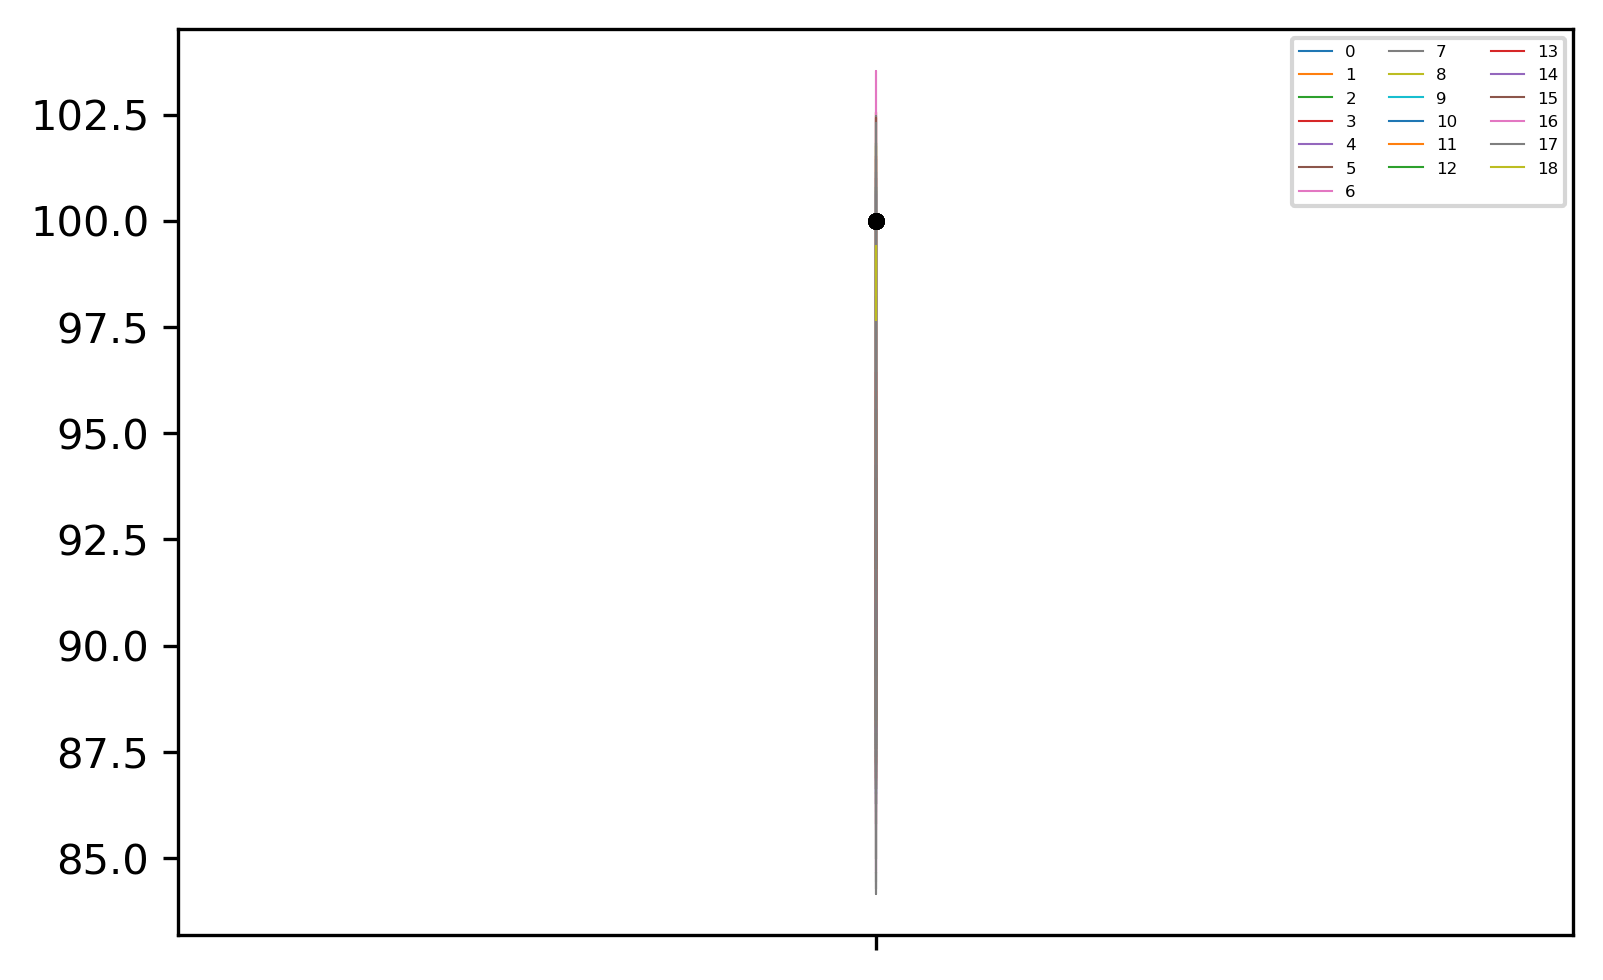

In [644]:
plt.figure(dpi=300)
x1=0
x2=-1
#x1=19
#x2=21
for i in range(19):
    plt.plot(dates[:],P2dB(np.sum(D[:,7:,i,i]*Cnt[:,7:],axis=1)/np.sum(Cnt[:,7:],axis=1)),'-',label='%i'%i,linewidth=0.5)
#mask=P2dB(np.sum(D[:,:,0,0],axis=1))
mask=P2dB(np.sum(D[:,7:,i,i]*Cnt[:,7:],axis=1)/np.sum(Cnt[:,7:],axis=1))
#mask=np.array([np.isreal(x)*(x>90)*(x<92)*1 for x in mask])
mask=np.array([np.isreal(x)*1 for x in mask])
#mask[-3]=0
mask[:-30]=0
plt.plot(dates[:],100/mask,'k.')
tms=np.arange(len(mask),dtype=int).compress(mask)
print(tms)
plt.legend(ncol=3,fontsize=4)
locs, labels = plt.xticks()
plt.xticks(locs[::],rotation=90,fontsize=8);

In [645]:
#D2=np.sum(D[tms,:]*Cnt[tms,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt[tms,:],axis=0)[:,np.newaxis,np.newaxis]
#D2=np.sum(D[tms,:]*Cnt[tms,:,np.newaxis,np.newaxis],axis=0)/np.sum(Cnt[tms,:],axis=0)[:,np.newaxis,np.newaxis]
tms=D.shape[0]-1
print(tms)
D2=D[tms,:]#/Cnt[tms,:][:,np.newaxis,np.newaxis]

8


In [646]:
plt.plot(Cnt[tms,:])

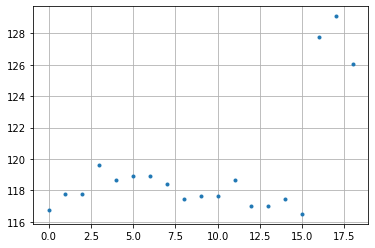

In [647]:
pwr=[P2dB(np.sum(D2[:,i,i])+1) for i in range(19)]
plt.plot(pwr,'.')
plt.grid()

In [648]:
#sis=np.array(range(len(pwr)))
#sis=sis.compress((np.array(pwr)>10)*(np.array(pwr)<120))
sis=[0,1,2,3,4,5,6]
print(sis)

[0, 1, 2, 3, 4, 5, 6]


In [649]:
#sis=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
#pairs=[[x,x+2] for i,x in enumerate(sis[:-2])]
#pairs=[[x,y] for i,x in enumerate(sis) for y in sis[i+1:i+2]]
a1=7*2
pairs=[[a1-2,18],[a1-1,18],[a1,18],[a1+1,18],[a1+2,18],[a1+3,18]]
#pairs=[[0,4],[1,4],[2,4],[3,4],[5,4]]
#pairs=[[0,1]]
#pairs+=[[10,12],[11,13]]
#pairs=[[2,4],[4,6]]
print(pairs)


[[12, 18], [13, 18], [14, 18], [15, 18], [16, 18], [17, 18]]


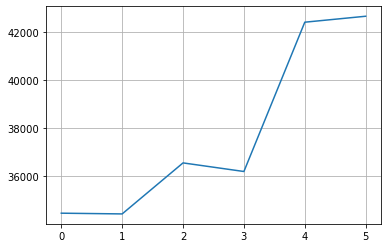

In [650]:
PPwr=[np.sum(P2dB(np.roll(D2[:,p[1],p[0]],-7)+1e-6)[1:]) for p in pairs]
plt.plot(PPwr)
Pcut=12000
plt.grid()
#plt.ylim(5000,8000)

Text(0.5, 0, 'Frequency (MHz)')

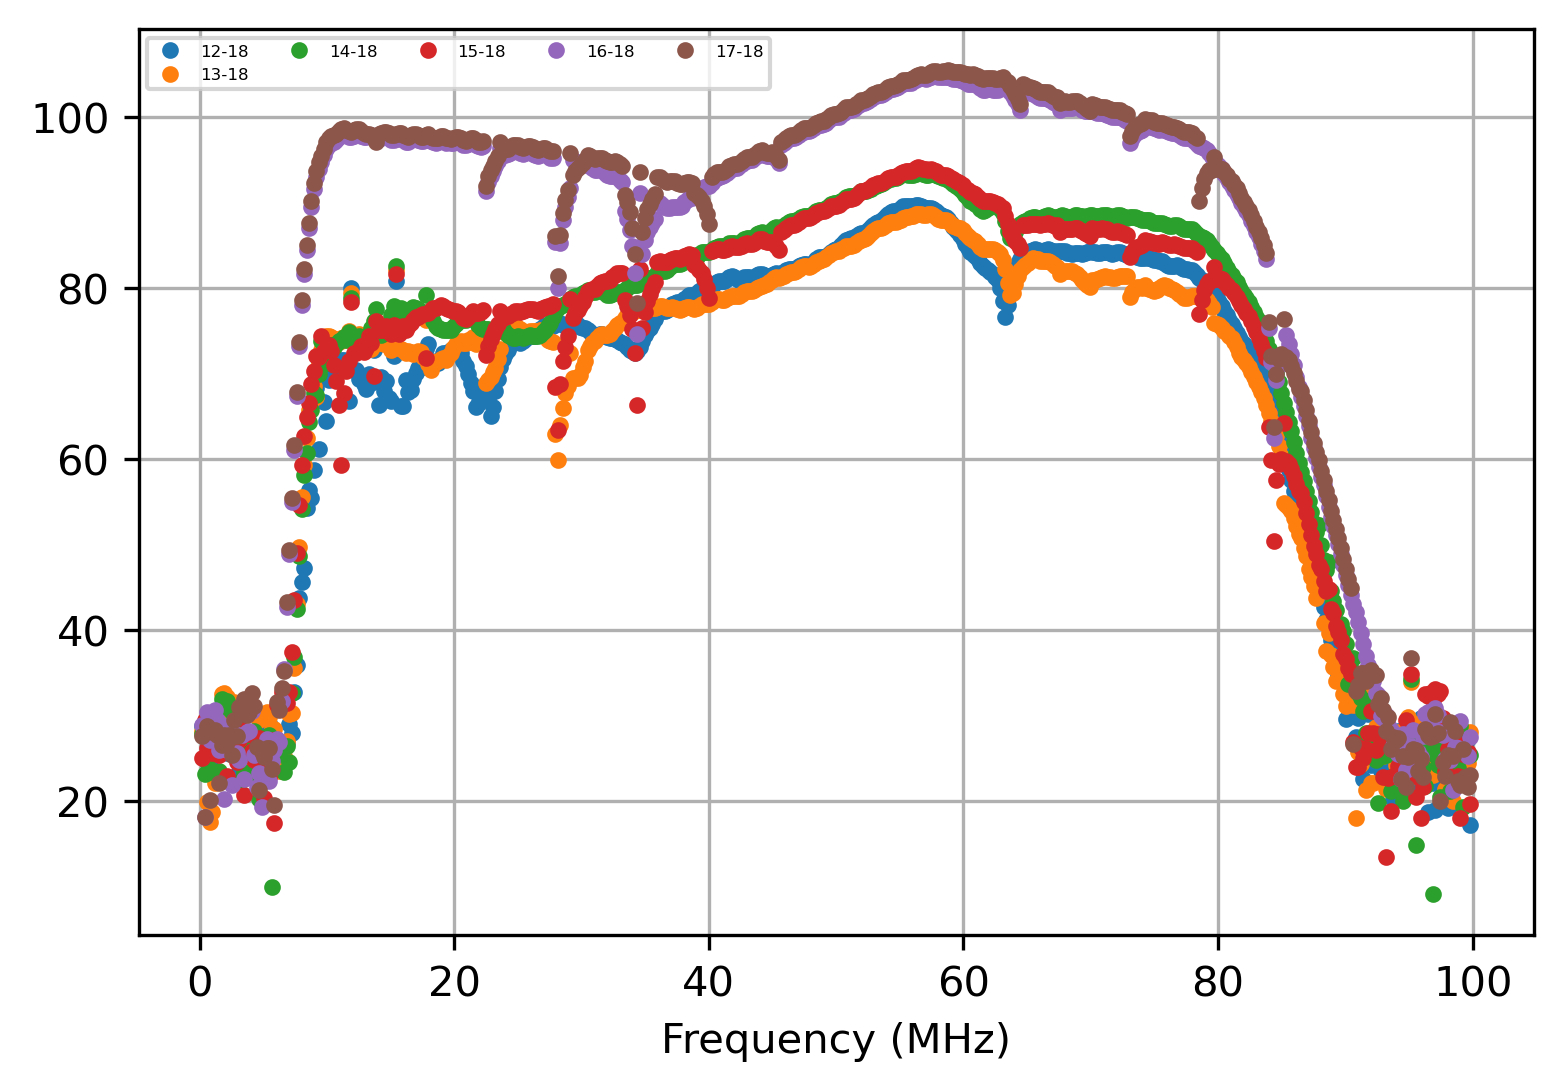

In [651]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs):
#    if PPwr[i]<Pcut: continue;
    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],'.',label='%i-%i'%(p1,p2),linewidth=1)
#    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-6))[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(40,120)
#plt.xlim(40,60)
plt.grid()
plt.xlabel("Frequency (MHz)")

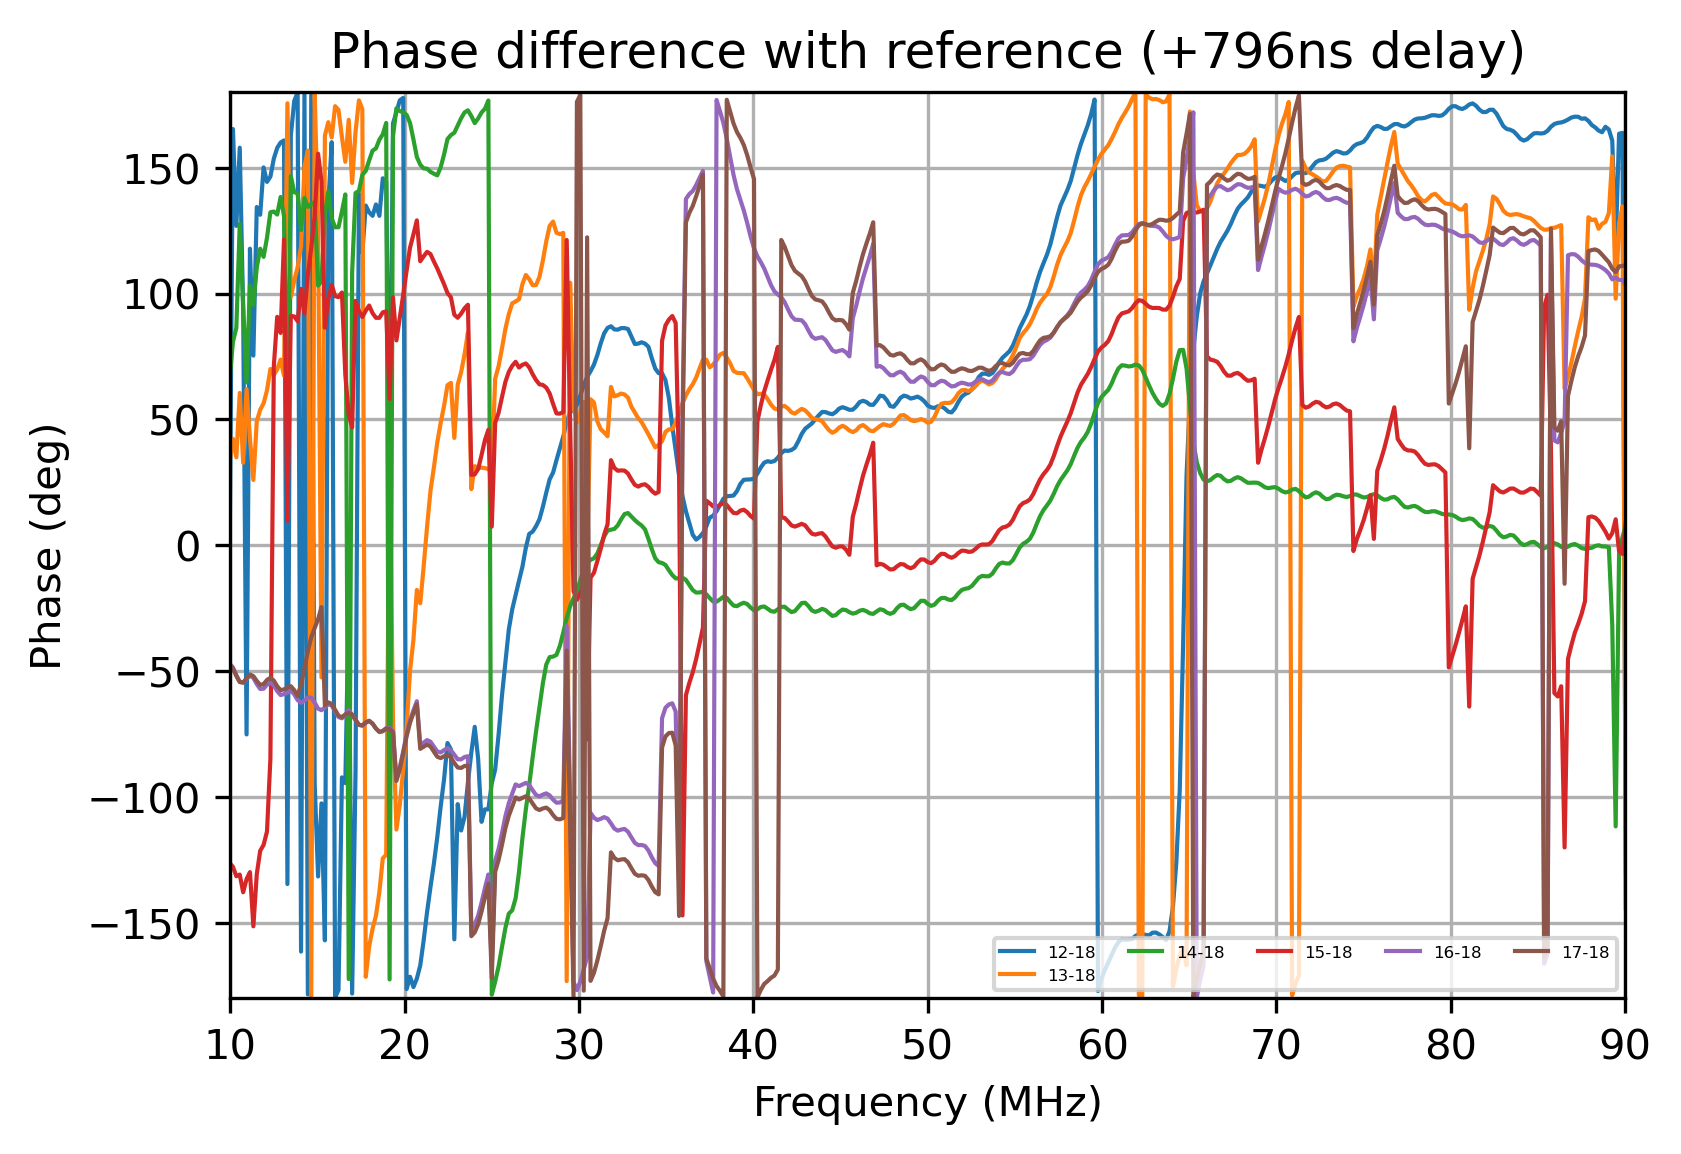

In [654]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
dx=20e-9
d0=796e-9
#d=[d0+dx,d0+dx,d0,d0,d0+dx,d0+dx];
#dx=25e-9
#d0=810e-9
#dx=25e-9
#dx=20e-9
#d0=830e-9
#d=[d0,d0-3e-9,d0+dx,d0+dx+1e-9,d0+2*dx,d0+2*dx+5e-9];
d=[d0+2*dx,d0+2*dx,d0+dx,d0+dx,d0,d0];
#d=830e-9;
for i,[p1,p2] in enumerate(pairs):
#    if PPwr[i]<Pcut: continue;
#    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
    d1=np.exp(2j*np.pi*freq*1e6*d[i])
    ph=np.angle(np.roll(D2[:,p2,p1]/d1,0))
#    print(ph[100])
#    if np.abs(ph[100])>np.pi/2: ph=np.angle(-np.roll(D2[:,p2,p1],0)/d1)

    plt.plot(freq[1:],ph[1:]/np.pi*180,label='%i-%i'%(p1,p2),linewidth=1)
#plt.plot(freq,np.angle(d))

plt.legend(fontsize=4,ncol=5)
plt.xlim(10,90)
plt.ylim(-180,180)
plt.grid()
plt.xlabel("Frequency (MHz)");plt.ylabel("Phase (deg)")
plt.title("Phase difference with reference (+796ns delay)");

Text(0.5, 0, 'Frequency (MHz)')

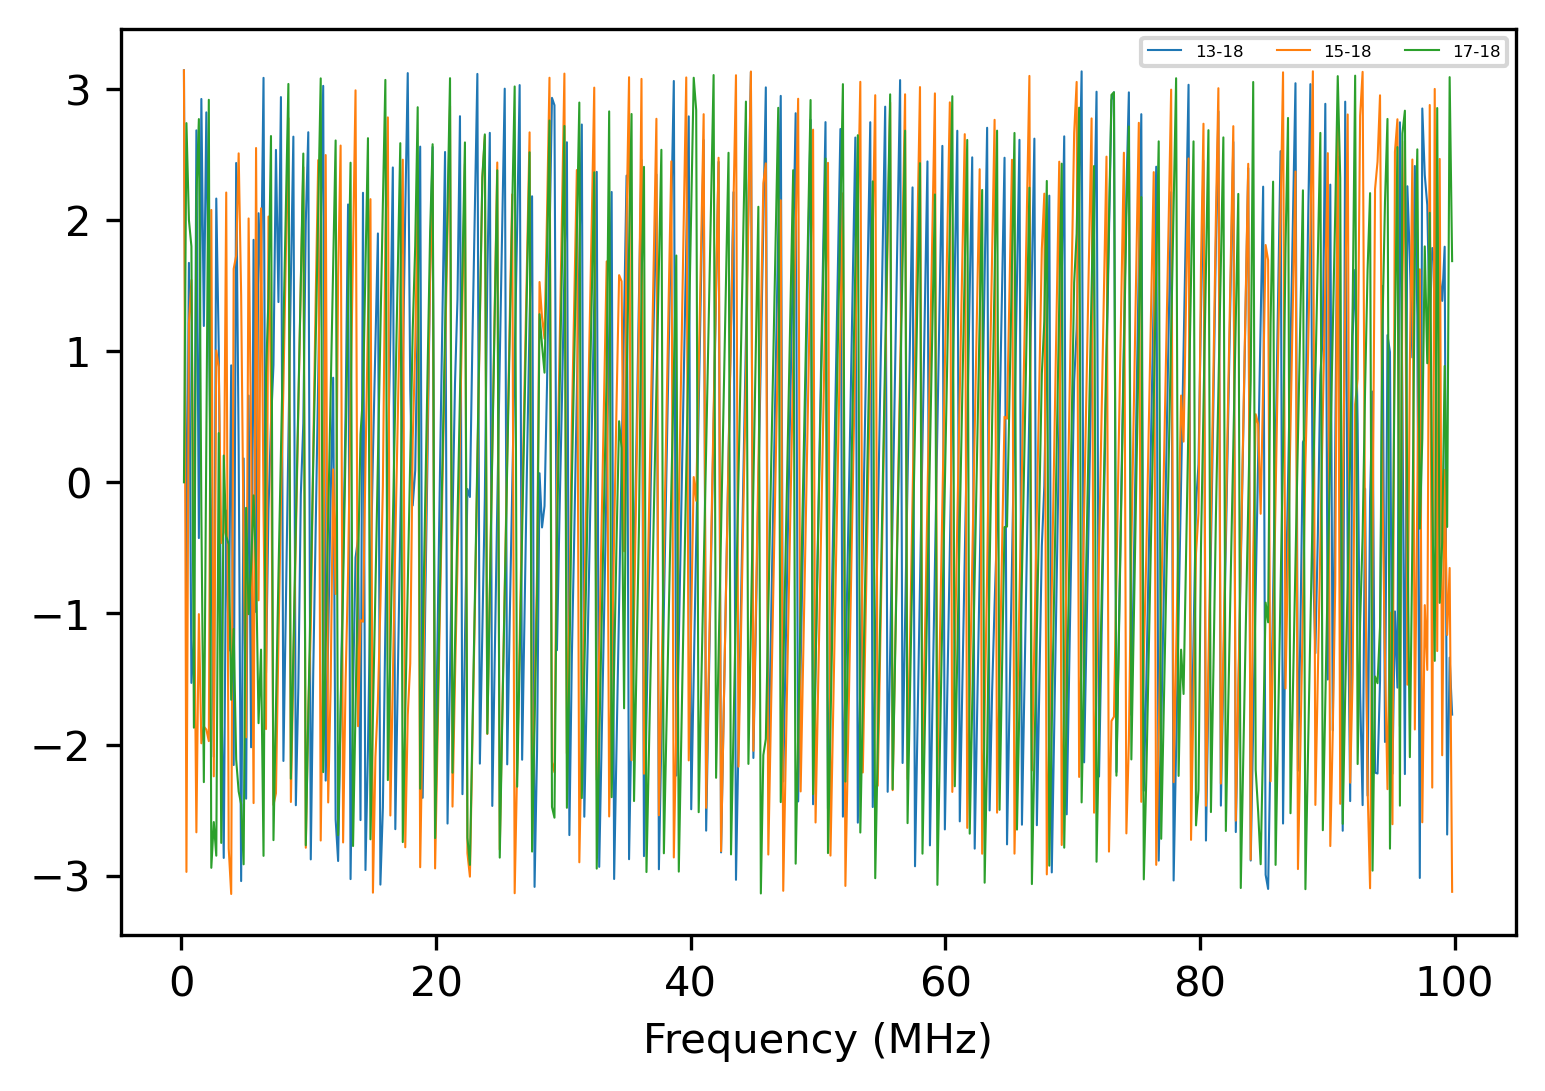

In [653]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs[1::2]):
#    if PPwr[i]<Pcut: continue;
#    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],label='%i-%i'%(p1,p2),linewidth=0.05)
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-6))[1:],label='%i-%i'%(p1,p2),linewidth=0.5)
plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")

In [474]:
cntmean=(np.mean(np.sum(Cnt,axis=0)))
print(P2dB(cntmean**2))

26.353433339663972


Text(0.5, 1.0, 'RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off')

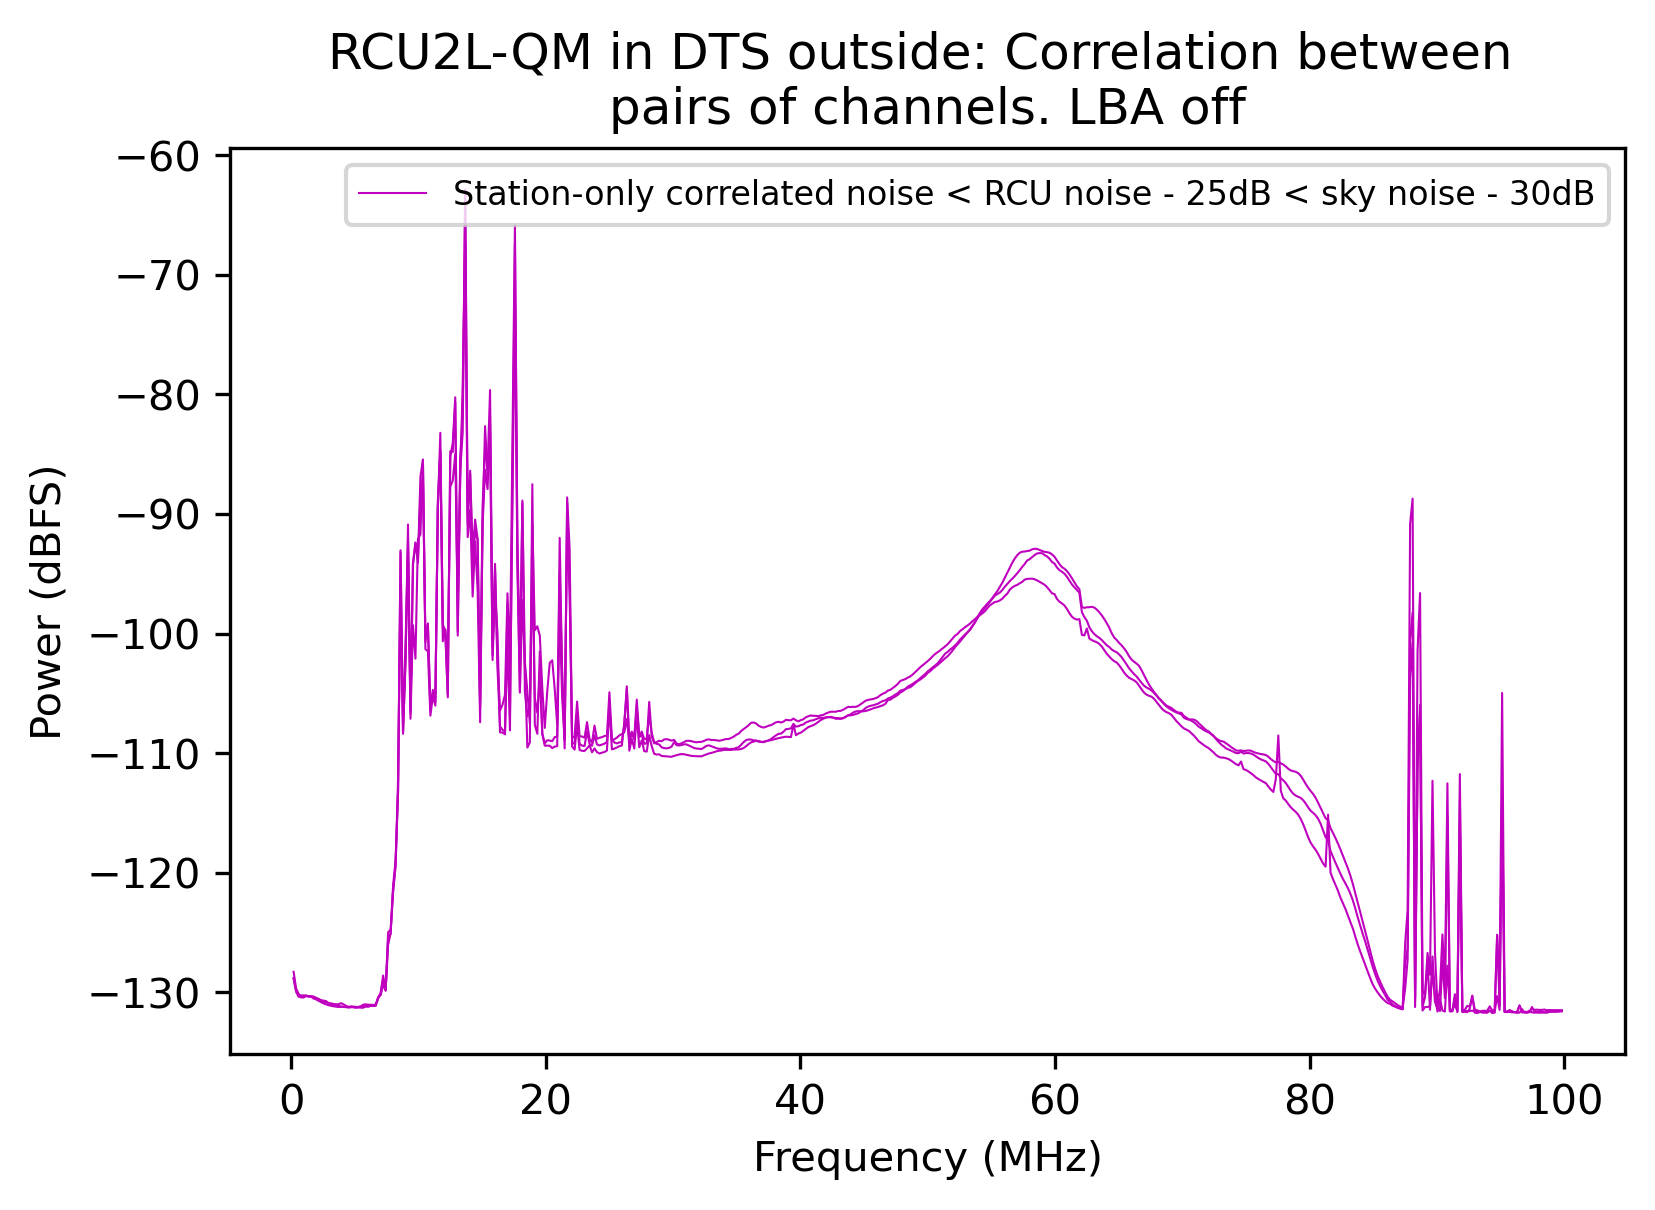

In [204]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
P1=np.zeros_like(freq[1:],dtype='float')
P2=np.zeros_like(freq[1:],dtype='complex')
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS

cnt=0;
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    P1+=np.abs(np.roll(D2[:,p2,p1],-7)[1:])
    P2+=(np.roll(D2[:,p2,p1],-7)[1:])
    cnt+=1
    plt.plot(freq[1:],P2dB(np.roll(D2[:,p2,p1],-7)+1e-6)[1:]-GainADC,linewidth=0.1)
for i in sis[4:]:
    plt.plot(freq[1:],P2dB(np.roll(D2[:,i,i],-7))[1:]-30+5-GainADC,'m-',linewidth=0.5,label=('Station-only correlated noise < RCU noise - 25dB < sky noise - 30dB' if i==4 else ''))
#plt.plot(freq[1:],P2dB(P2/np.sqrt(cnt))-GainADC,'r-',linewidth=0.5,label='avg pwr')
#plt.plot(freq[1:],P2dB(P1/(cnt))-GainADC,'k-',linewidth=0.5,label='avg correlation')
plt.legend(fontsize=8,ncol=1)
#plt.ylim(0,30)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Power (dBFS)")
plt.title("RCU2L-QM in DTS outside: Correlation between \npairs of channels. LBA off")

Text(0.5, 0, 'Frequency (MHz)')

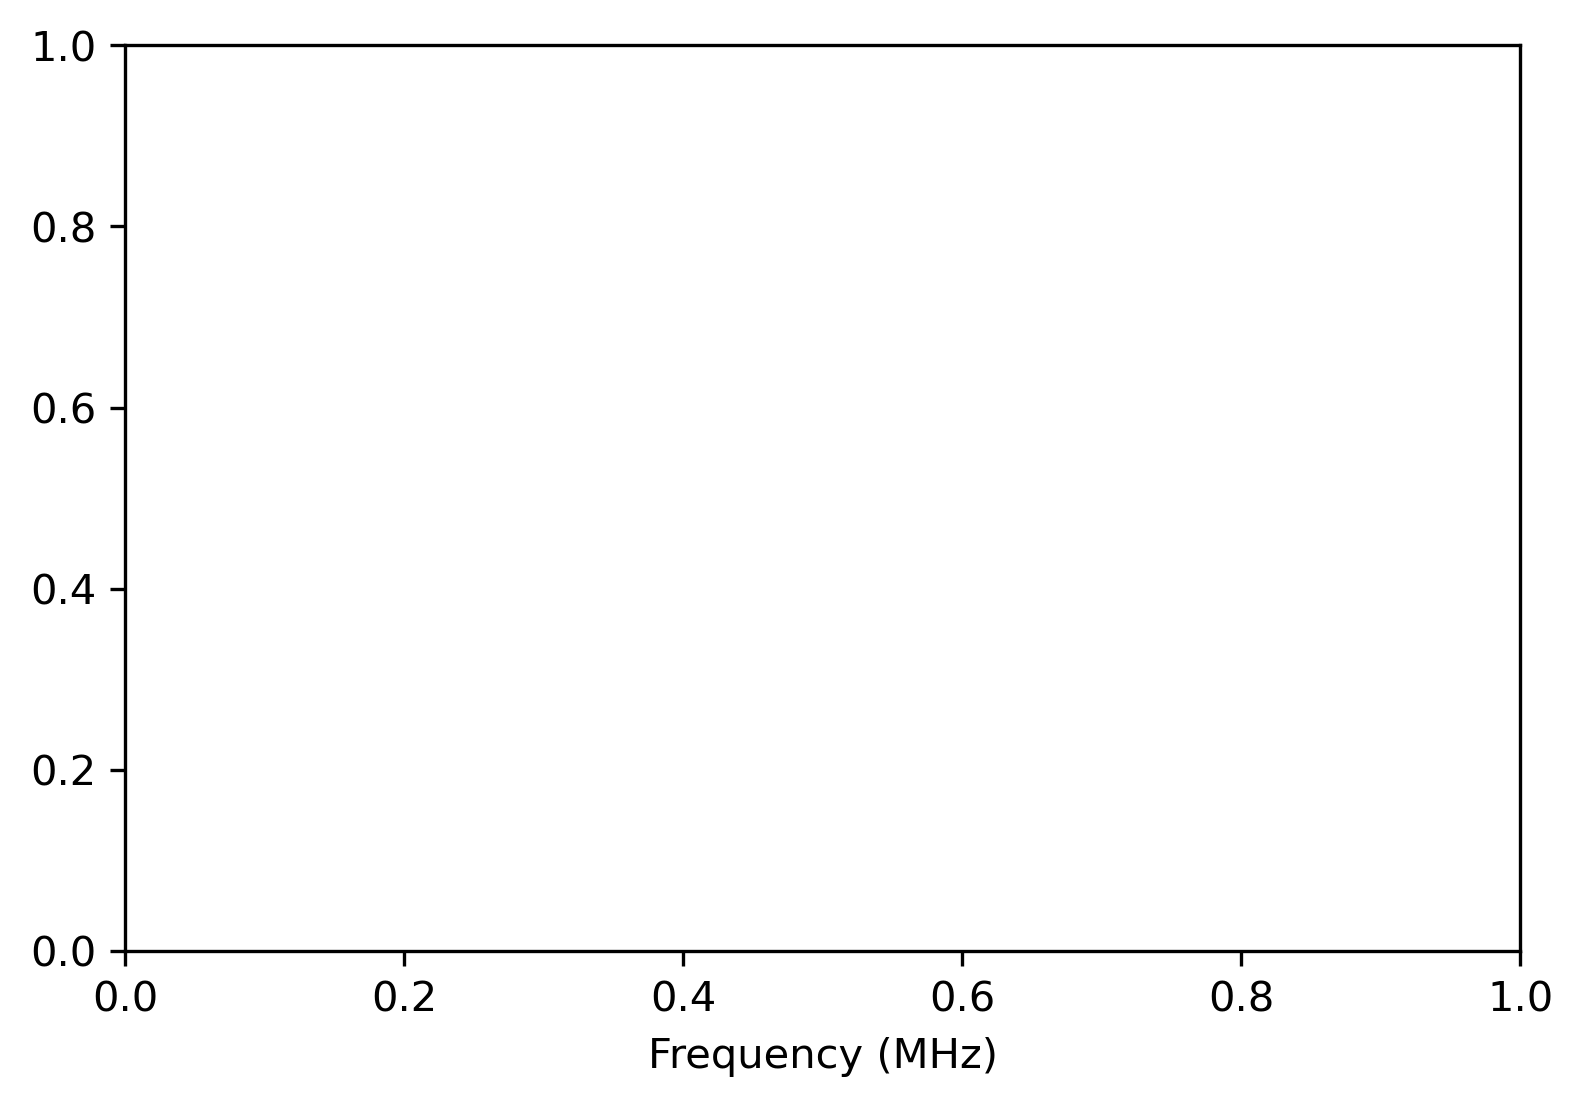

In [14]:
freq=np.arange(512)/512*100
plt.figure(dpi=300)
for i,[p1,p2] in enumerate(pairs):
    if PPwr[i]>Pcut: continue;
    plt.plot(freq[1:],np.angle(np.roll(D2[:,p2,p1],-7)+1e-6)[1:],'.',markersize=0.2,label='%i-%i'%(p1,p2),linewidth=0.05)
#plt.legend(fontsize=4,ncol=5)
#plt.ylim(0,60)
plt.xlabel("Frequency (MHz)")